## SI 670 Applied Machine Learning, Week 2:  Basic supervised learning concepts (Due Wednesday 09/14/2022 11:59pm)

For this assignment, you will be practicing various machine learning operations in scikit-learn related to linear regression, polynomial feature expansion and underfitting/overfitting.

* This homework is worth 100 points in total. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

* Submit your completed notebook file to the Canvas site - **IMPORTANT**: <span style='color:red'>please name your submitted file `si670f22-hw2-youruniqname.ipynb`</span> 

* Any file submitted after the deadline will be marked as late. Please consult the syllabus regarding late submission policies. You can submit the homework as many time as you want, but only your latest submission will be graded.

* As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates. If you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.



In [3]:
# <span style='color:red'>red text</span> 

### Question 1(40 points)

Your goal for this question is to run a simple linear regression on the data, and investigate its performance. Note that this question has multiple parts. 

First you need to run the following block, which sets up the training and test datasets to be used for this question.

In [1]:
import numpy as np

# We fix the state of the random number generator here in order to maintain consistency in the results
rs = np.random.RandomState(0)
X_train = rs.uniform(size = (100, 1))
y_train = 5 * X_train + 8
X_test = rs.uniform(size = (20, 1))
y_test = 7 * X_test + 1

In [42]:
##### delete this

# investigate performance
# print('linear model coeff (w): {:.3f}'
#      .format(linreg.coef_.reshape([1,])[0]))
# print('linear model intercept (b): {:.3f}'
#      .format(linreg.intercept_.reshape([1,])[0]))
# print('R-squared score (training): {:.3f}'
#      .format(linreg.score(X_train, y_train)))
# print('R-squared score (test): {:.3f}'
#      .format(linreg.score(X_test, y_test)))

##### delete this

Now, write a function that takes in training data as input, and fits a line to the data using a linear regression model. Your function should return the linear regression model.

In [41]:
def fit_line(X_train, y_train):
    from sklearn.linear_model import LinearRegression
    
    # fit a linear regression model to the input data, name it `linreg'
    linreg = LinearRegression().fit(X_train, y_train)
    
    # Return the linear regression model you created
    return linreg

Run the following block of code in order to (1) compute the the $R^2$ (coefficient of determination) regression score on both training and test datasets, and then (2) plot the training and test datasets in the same figure, marked by different colors (blue for training data, red for test data).

R-squared score (training): 1.000
R-squared score (test): -11.533


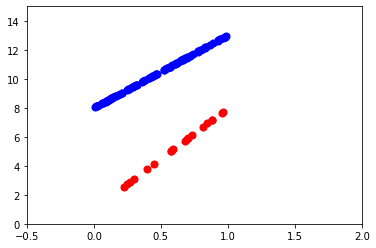

In [47]:
# Fit a line to the dataset we generated at the beginning of this problem using your function
linreg = fit_line(X_train, y_train)

# Compute R^2 score of your model on training and test sets
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

# Plot the training and test datasets in the same figure marked by different colors
import matplotlib.pyplot as plt

fig = plt.figure()
plt.xlim(-0.5, 2)
plt.ylim(0, 15)
plt.scatter(X_train, y_train, c='blue', marker='o', s=50) # Blue points are from training dataset
plt.scatter(X_test, y_test, c='red', marker='o', s=50) # Red points are from test dataset

What does the $R^2$ score of your model on the two datasets tell you about the performance of your model? Using the plot of the two datasets, why do you think we get these $R^2$ scores? Please provide your answer in the text cell below.

* $R^2$ is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.
* Here, we get R-squared score (training): 1.000, perfectly fit, but R-squared score (test): -11.533, a large negative value, which means the fit performance on test data is so poor.
* This is because we use the train dataset to train the linear model, but the train and test datasets are generated totally differently and separately (can see from the plot):
* y_train = 5 * X_train + 8
* y_test = 7 * X_test + 1
* which does not follow the assumption that the train and test data should be similar.

### Preliminary for questions 2 and 3
Before continuitng on to the next question, run the following block to set up the variables needed for later sections. It generates training and test data that we're going to use to fit a non-linear function (as opposed to the traditional linear regression problems you saw in the previous questions).

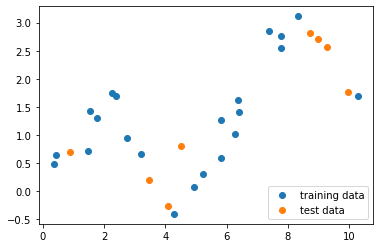

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split

# generate ramdom data points X and y
np.random.seed(0)
n = 30
x = np.linspace(0, 10, n) + np.random.randn(n) / 5
y = np.sin(x) + x / 4 + np.random.randn(n) / 3

# split 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
part1_scatter()  # let's plot the training and test data for the upcoming questions.

In [86]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22,)
(8,)
(22,)
(8,)


### Question 2 (30 points)

Write a function that fits a polynomial curve to the data, by using a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Recall that we use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model to those extended features). For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

Note that you can run the `plot_two()` function to see the fitted curves on top of the dataset.

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [153]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    result = np.empty([4, 100])
    degrees = [1, 3, 6, 9]
    
    for index, i in enumerate(degrees):
        
        # feature expend to poly features for X_train
        poly = PolynomialFeatures(degree=i) 
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        
        # fit the model, get the better model from ployed train data
        linreg = LinearRegression().fit(X_train_poly, y_train)
        
        # use the same model to make predictions on the 100 interval values(polyed)
        # cause follow the same feature pattern on X_train, do poly to interval datas
        interval_data_poly = poly.fit_transform(np.linspace(0,10,100).reshape(-1, 1))
        predicted_values = linreg.predict(interval_data_poly)
        
        # concate all degree's prediction results
        result[index, :] = predicted_values
        
    return result

# check
print(answer_two().shape)
print(type(answer_two()))
answer_two()

(4, 100)
<class 'numpy.ndarray'>


array([[ 0.49947299,  0.51663261,  0.53379223,  0.55095185,  0.56811148,
         0.5852711 ,  0.60243072,  0.61959034,  0.63674996,  0.65390958,
         0.6710692 ,  0.68822883,  0.70538845,  0.72254807,  0.73970769,
         0.75686731,  0.77402693,  0.79118655,  0.80834617,  0.8255058 ,
         0.84266542,  0.85982504,  0.87698466,  0.89414428,  0.9113039 ,
         0.92846352,  0.94562315,  0.96278277,  0.97994239,  0.99710201,
         1.01426163,  1.03142125,  1.04858087,  1.06574049,  1.08290012,
         1.10005974,  1.11721936,  1.13437898,  1.1515386 ,  1.16869822,
         1.18585784,  1.20301747,  1.22017709,  1.23733671,  1.25449633,
         1.27165595,  1.28881557,  1.30597519,  1.32313482,  1.34029444,
         1.35745406,  1.37461368,  1.3917733 ,  1.40893292,  1.42609254,
         1.44325216,  1.46041179,  1.47757141,  1.49473103,  1.51189065,
         1.52905027,  1.54620989,  1.56336951,  1.58052914,  1.59768876,
         1.61484838,  1.632008  ,  1.64916762,  1.6

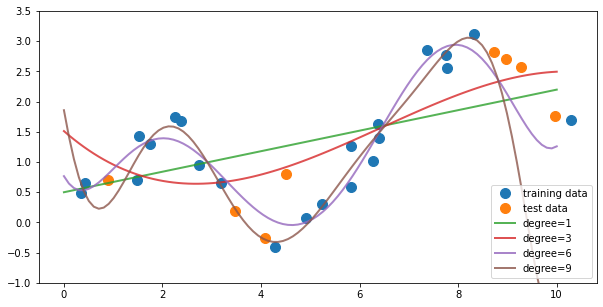

In [155]:
def plot_two(degree_predictions):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    plt.figure(figsize=(10,5))
    
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
        # here, the degree_predictions are the (4, 100) np.array we get from previous question
        # plot(x_values, y_values)
        
    plt.ylim(-1,3.5)
    plt.legend(loc=4)

plot_two(answer_two())

### Question 3 (30 points)

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

Based on the $R^2$ scores above (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? Note: there may be multiple correct solutions to this question.

(Hint: you can plot the r2_train and r2_test vs the degree to investigate underfitting/overfitting.)

*This function should return one tuple of numpy arrays `(r2_train, r2_test, Underfitting, Good_Generalization, Overfitting)`, where both `r2_train` and `r2_test` should have shape `(10,)`, and `Underfitting, Good_Generalization, Overfitting` should be three lists of int partitioning 0-9.*

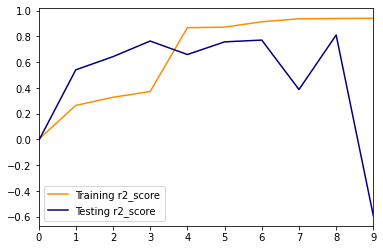

(array([0.        , 0.26439755, 0.32742358, 0.37220126, 0.86736045,
        0.87144785, 0.91335744, 0.93652344, 0.93840679, 0.94068506]),
 array([-0.01063969,  0.54040848,  0.64266551,  0.76381091,  0.65922591,
         0.75737122,  0.77130324,  0.38779952,  0.81042065, -0.59293955]),
 [0, 1, 2, 3],
 [4, 5, 6, 8],
 [7, 9])

In [189]:
def answer_three():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # 
    #result = np.empty([4, 100])
    degrees = [0,1,2,3,4,5,6,7,8,9]

    r2_train = []
    r2_test = []

    for index, i in enumerate(degrees):

        # feature expend to poly features for X_train
        poly = PolynomialFeatures(degree=i) 
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))

        # fit the model, get the better model from ployed train data
        linreg = LinearRegression().fit(X_train_poly, y_train)

        # use the same model to test on test dataset (polyed)
        X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))
        y_pred = linreg.predict(X_test_poly)

        # print('R-squared score (training): {:.3f}'
        #      .format(linreg.score(X_train_poly, y_train)))
        # print('R-squared score (test): {:.3f}'
        #      .format(linreg.score(X_test_poly, y_test)))

        r2_train.append(linreg.score(X_train_poly, y_train))
        r2_test.append(linreg.score(X_test_poly, y_test))
    
    # plot
    # r2_train and r2_test (both on the y-axis) against the list of degrees (on the x-axis)
    plt.plot(degrees, r2_train, label='Training r2_score', color='darkorange')
    plt.plot(degrees, r2_test, label='Testing r2_score', color='navy')
    plt.legend(loc='best')
    plt.xlim(0,9)
    plt.show()

    # evaluation (get from plot)
    Underfitting = [0, 1, 2, 3]
    Good_Generalization = [4, 5, 6, 8]
    Overfitting = [7, 9]

    return (np.array(r2_train), np.array(r2_test), Underfitting, Good_Generalization, Overfitting)

answer_three()


# check
# print(np.shape(r2_train))
# print(np.shape(r2_test))

* according to the plot, we can see degree level: 
* [0, 1, 2, 3] corresponds to underfitting models, because the $R^2$ is low, test $R^2$ is higher than train $R^2$, and they are in continuous growth; 
* [4, 5, 6, 8] corresponds to good generalization performance, because the $R^2$ nearly get the highest value, both for test and train; 
* [7, 9] corresponds to overfitting models, because the test $R^2$ is dropping with train $R^2$ is slightly increasing;
* 